In [1]:

from scipy.integrate import solve_ivp
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt

In [2]:
# http://people.math.sfu.ca/~jverner/RKV65.IIIXb.Efficient.00000144617.081204.RATOnWeb
### Definition of the rk6 methods used => 
C = [0, 0.06, 0.09593333333333333, 0.1439, 0.4973, 0.9725, 0.9995, 1, 1]
B = [0.03438957868357036, 0, 0, 0.2582624555633503, 0.4209371189673537, 4.40539646966931, -176.48311902429865, 172.36413340141507, 0]
B_hat = [0.04301298296577121, 0, 0, 0.23882842561019763, 0.4493871915553917, 2.2956854086040193, -73.02457612433467, 70.96432878226597, 0.03333333333333333]

A = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0.06, 0, 0, 0, 0, 0, 0, 0, 0],
    [0.019239962962962962, 0.07669337037037037, 0, 0, 0, 0, 0, 0, 0],
    [0.035975, 0, 0.107925, 0, 0, 0, 0, 0, 0],
    [1.3186834152331484, 0, -5.042058063628562, 4.220674648395414, 0, 0, 0, 0, 0],
    [-41.872591664327516, 0, 159.4325621631375, -122.11921356501003, 5.531743066200054, 0, 0, 0, 0],
    [-54.430156935316504, 0, 207.06725136501848, -158.61081378459, 6.991816585950242, -0.018597231062203234, 0, 0, 0],
    [-54.66374178728198, 0, 207.95280625538936, -159.2889574744995, 7.018743740796944, -0.018338785905045722, -0.0005119484997882099, 0, 0],
    [0.03438957868357036, 0, 0, 0.2582624555633503, 0.4209371189673537, 4.40539646966931, -176.48311902429865, 172.36413340141507, 0],
]

n_stages = 9
### end of definition of the method

### begin => definition of the hb6 quintics
# d0's coefficient =>  {a[0]: 3/4, b[0]: -1/2, c[0]: -5/4, d[0]: 1, e[0]: 0, f[0]: 0}
# d1's coefficient =>  {a[1]: 1/4, b[1]: -1/4, c[1]: -1/4, d[1]: 1/4, e[1]: 0, f[1]: 0}
# d2's coefficient =>  {a[2]: 0, b[2]: 1, c[2]: 0, d[2]: -2, e[2]: 0, f[2]: 1}
# d3's coefficient =>  {a[3]: 1, b[3]: 0, c[3]: -2, d[3]: 0, e[3]: 1, f[3]: 0}
# d4's coefficient =>  {a[4]: -3/4, b[4]: -1/2, c[4]: 5/4, d[4]: 1, e[4]: 0, f[4]: 0}
# d5's coefficient =>  {a[5]: 1/4, b[5]: 1/4, c[5]: -1/4, d[5]: -1/4, e[5]: 0, f[5]: 0}

def d0(x):
    return 3/4*(x**5) + -1/2*(x**4) + -5/4*(x**3) + 1*(x**2) + 0*x + 0

def d1(x):
    return 1/4*(x**5) + -1/4*(x**4) + -1/4*(x**3) + 1/4*(x**2) + 0*x + 0
def d2(x):
    return 0*(x**5) + 1*(x**4) + 0*(x**3) + -2*(x**2) + 0*x + 1
def d3(x):
    return 1*(x**5) + 0*(x**4) + -2*(x**3) + 0*(x**2) + 1*x + 0
def d4(x):
    return -3/4*(x**5) + -1/2*(x**4) + 5/4*(x**3) + 1*(x**2) + 0*x + 0
def d5(x):
    return 1/4*(x**5) + 1/4*(x**4) + -1/4*(x**3) + -1/4*(x**2) + 0*x + 0

def create_hb(
    x_i,
    h_i,
    y_i_minus_1,
    f_i_minus_1,
    y_i,
    f_i,
    y_i_plus_1,
    f_i_plus_1 ):
    def hb(x):
        pheta = (x - x_i) / h_i  # x = t_i + pheta*h_i so pheta = (x - t_i) / h_i
        return (  d0(pheta) * y_i_minus_1 + h_i * d1(pheta) * f_i_minus_1
                + d2(pheta) * y_i         + h_i * d3(pheta) * f_i 
                + d4(pheta) * y_i_plus_1  + h_i * d5(pheta) * f_i_plus_1
            )
    return hb

def d0_prime(x):
    return 5*3/4*(x**4) + 4*-1/2*(x**3) + 3*-5/4*(x**2) + 2*1*x + 0
def d1_prime(x):
    return 5*1/4*(x**4) + 4*-1/4*(x**3) + 3*-1/4*(x**2) + 2*1/4*x + 0
def d2_prime(x):
    return 5*0*(x**4) + 4*1*(x**3) + 3*0*(x**2) + 2*-2*x + 0
def d3_prime(x):
    return 5*1*(x**4) + 4*0*(x**3) + 3*-2*(x**2) + 2*0*x + 1
def d4_prime(x):
    return 5*-3/4*(x**4) + 4*-1/2*(x**3) + 3*5/4*(x**2) + 2*1*x + 0
def d5_prime(x):
    return 5*1/4*(x**4) + 4*1/4*(x**3) + 3*-1/4*(x**2) + 2*-1/4*x + 0

def create_hb_prime(
    x_i,
    h_i,
    y_i_minus_1,
    f_i_minus_1,
    y_i,
    f_i,
    y_i_plus_1,
    f_i_plus_1 ):
    def hb_prime(x):
        pheta = (x - x_i) / h_i  # x = t_i + pheta*h_i so pheta = (x - t_i) / h_i
        return (  d0_prime(pheta) * y_i_minus_1 / h_i + d1_prime(pheta) * f_i_minus_1
                + d2_prime(pheta) * y_i         / h_i + d3_prime(pheta) * f_i 
                + d4_prime(pheta) * y_i_plus_1  / h_i + d5_prime(pheta) * f_i_plus_1
            )
    return hb_prime

# returns a function that calls the appropriate interpolant
def create_sol(interps):
    def sol(x):
        for (x_i_minus_1, x_i_plus_1, hb) in interps:
            if (x_i_minus_1 <= x <= x_i_plus_1):
                return hb(x)
        else:
            print("ERROR: NO INTERVAL matches this x_value", x, interps)
    return sol

# the rk6 with Hermite Birkhoff version is NOT SUPPOSED TO BE efficient
# it is a proof of concept => in an actual implementation, we would create a matrix which will store all the
# coefficients and we only create the solution/interpolant only when we need it from the coefficients
# we would also minimise the number of function evaluations further....
def rk6_with_hb(f, y0, start, end, tol):
    xn = start
    yn = y0
    res = [ (xn, yn) ]
    fn_s = [ f(xn, yn)[0] ] 
    h = 1e-6

    interps = []
    derivs = []
    index = 0 # need to start doing interpolation on when index >= 2

    while (xn < end):
        k = [0.0] * n_stages # len(k) == n_stages

        # old_f = fn_s[-1]
        # for i in range(n_stages):
        k[0] = fn_s[-1]
        for i in range(1, n_stages):
            adding_to_yn = 0.0
            for j in range(i):
                adding_to_yn += A[i][j] * k[j]
            adding_to_yn *= h
            k[i] = f(xn + C[i] * h, yn + adding_to_yn*h)[0]
        # print(abs(old_f - k[0]), abs(old_f - k[0]) < 1e-10)
        LC_of_k_b = 0
        for i in range(n_stages):
            LC_of_k_b += k[i] * B_hat[i] # B_hat has more stages so I assumed that it is the higher level interpolant


        # fn_s.append(k[0]) # k[0] = f(xn, yn) because C[i] = 0 and the row A[0] is all zeros

        # yn = yn + h * (LC_of_k_b)
        # xn = xn + h
        # res.append( (xn, yn) )

        index += 1

        if (index < 2):
            # we assume the step is accepted
            (xn, yn) = (xn + h,  yn + h * (LC_of_k_b)) 
            res.append( (xn, yn) )

            # the last stage evaluation k[-1] is the next k[0] => it is a function evaluation at f(xn_plus_1, yn_plus_1)
            fn_s.append(k[-1])
        if (index >= 2):
                # at index === i, we need to build an interpolant around x_i_minus_1 as it is the only one with enough data
                # we get the data from res and from fn_s
                (x_i_plus_1, y_i_plus_1) =      ( xn + h,  yn + h * (LC_of_k_b) ) 
                (x_i, y_i) =                    res[-1]
                (x_i_minus_1, y_i_minus_1) =    res[-2]
                h_i = h

                f_i_plus_1 =    k[-1]
                f_i =           fn_s[-1]
                f_i_minus_1 =   fn_s[-2] # my current implementation make the call for f_i_plus_1 in the next iteration => so currenlty cannot do this fn_s[-3] => need to call...

                this_hb = create_hb(
                    x_i, x_i_plus_1 - x_i,
                    y_i_minus_1, f_i_minus_1,
                    y_i, f_i,
                    y_i_plus_1, f_i_plus_1
                )
                this_hb_prime = create_hb_prime(
                    x_i, x_i_plus_1 - x_i,
                    y_i_minus_1, f_i_minus_1,
                    y_i, f_i,
                    y_i_plus_1, f_i_plus_1
                )
                # we assume that the defect is maximum at 0.87 in the middle of the interval of size 2
                x_max_defect = x_i_minus_1 + (x_i_plus_1 - x_i_minus_1) * 0.87 / 2
                max_defect = this_hb_prime(x_max_defect) - f(x_max_defect, this_hb(x_max_defect))[0]
                print(x_i_minus_1, x_i_plus_1, max_defect)

                # accept everything but take a bigger step if defect significantly smaller than tolerance
                interps.append( ( x_i_minus_1, x_i_plus_1, this_hb ) )
                derivs.append( ( x_i_minus_1, x_i_plus_1, this_hb_prime ) )

                yn = y_i_plus_1
                xn = x_i_plus_1
                res.append( (xn, yn) )

                # the last function evaluation here is the next step's first function evaluation
                fn_s.append(k[-1])

                # index = 0  # we create an interpolant only when we need to do so => every 2 steps    
    return (res, interps, derivs)



In [13]:
# we create a bunch of pts in the middle of a and b
# we also return their spacing 'xs' in [0, 2] so that we can plot them
def create_pts(a, b):
    num_points = 100
    curr = a
    res = [curr]
    h = (b - a) / num_points
    x = 0
    delta_x = 1/num_points
    xs = [x]
    for i in range(1, num_points + 1):
        curr += h
        res.append(curr)
        x += delta_x
        xs.append(x)
    return res, xs

In [14]:
def experiment(model, y0, t_span, solution):
    t_eval = [x/100 for x in range(t_span[1] * 100)]
    (res, interps, derivs) = rk6_with_hb(model, y0[0], t_span[0], t_span[1], 1e-3)

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    plt.figure()
    xs = [x[0] for x in res]
    ys = [x[1] for x in res]
    plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    sol = create_sol(interps)
    interp_ys = [sol(x) for x in t_eval]
    plt.plot(t_eval, interp_ys, label="rk6_interpolated")

    # dense = solve_ivp(model, t_span, y0, atol=1e-3, rtol=1e-3, dense_output=True)
    # sol = dense.sol(t_eval)
    # plt.plot(t_eval, sol[0], label="rk45")

    plt.plot(t_eval, solution(t_eval), label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6 vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend()
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== figure of defect
    plt.figure()
    for (x_i_minus_1, x_i_plus_1, hb_prime) in derivs:
        pts_to_sample, xs = create_pts(x_i_minus_1, x_i_plus_1)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb_prime(pt)
            defects.append(hb_prime_eval - f_eval)
        maximum_defect = max(defects)
        minimum_defect = min(defects)
        plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        plt.plot(xs, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("step scaled between 0 and 2")
    plt.ylabel('defect')
    plt.legend()
    plt.show()
    # ====================================== end figure of defect

0 2 0.00367093863436202
1 3 0.0005718611105963445
2 4 4.114414164341218e-06
3 5 1.360366725551565e-06
4 6 5.10786722140999e-07
5 7 1.851809780725744e-07
6 8 7.692184609414676e-08
7 9 3.550866565713018e-08
8 10 1.7805225675793235e-08


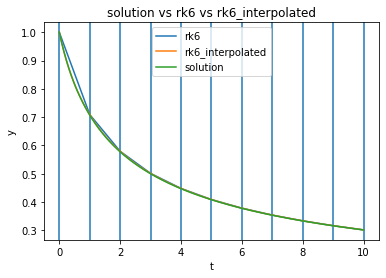

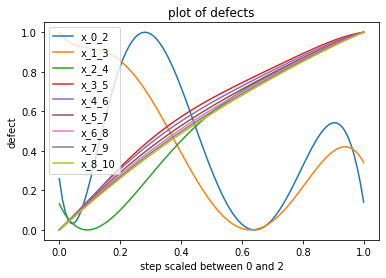

In [15]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

In [16]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

0 2 5.201639751523917e+19


OverflowError: (34, 'Numerical result out of range')

0 2 -1.0960015195404793e-07
1 3 -1.4729609149055634e-07
2 4 -1.7302968868815327e-07
3 5 -1.647750748068333e-07
4 6 -9.526574873408578e-08
5 7 5.539487957229028e-08
6 8 2.7771061406056674e-07
7 9 5.121146737785409e-07
8 10 6.528641109948552e-07


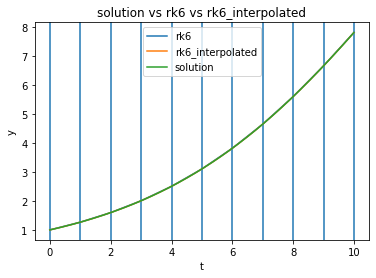

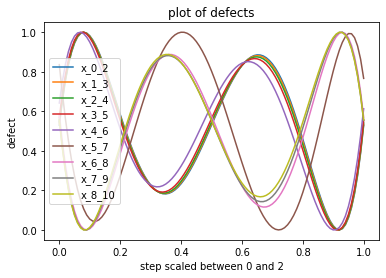

In [17]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

ERROR: NO INTERVAL matches this x_value 0.0 []
ERROR: NO INTERVAL matches this x_value 0.01 []
ERROR: NO INTERVAL matches this x_value 0.02 []
ERROR: NO INTERVAL matches this x_value 0.03 []
ERROR: NO INTERVAL matches this x_value 0.04 []
ERROR: NO INTERVAL matches this x_value 0.05 []
ERROR: NO INTERVAL matches this x_value 0.06 []
ERROR: NO INTERVAL matches this x_value 0.07 []
ERROR: NO INTERVAL matches this x_value 0.08 []
ERROR: NO INTERVAL matches this x_value 0.09 []
ERROR: NO INTERVAL matches this x_value 0.1 []
ERROR: NO INTERVAL matches this x_value 0.11 []
ERROR: NO INTERVAL matches this x_value 0.12 []
ERROR: NO INTERVAL matches this x_value 0.13 []
ERROR: NO INTERVAL matches this x_value 0.14 []
ERROR: NO INTERVAL matches this x_value 0.15 []
ERROR: NO INTERVAL matches this x_value 0.16 []
ERROR: NO INTERVAL matches this x_value 0.17 []
ERROR: NO INTERVAL matches this x_value 0.18 []
ERROR: NO INTERVAL matches this x_value 0.19 []
ERROR: NO INTERVAL matches this x_value 0.

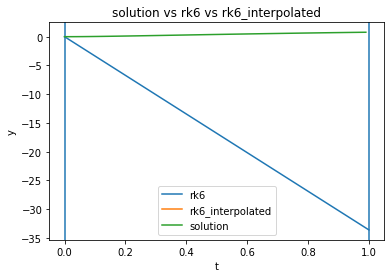

No handles with labels found to put in legend.


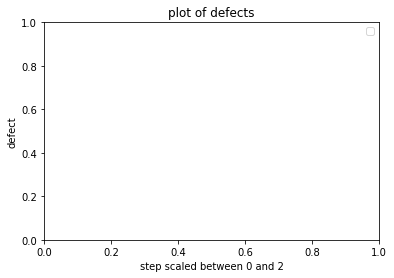

In [19]:
t_span_4 = [0, 1]
y0_4 = [0]

def model4(t, y):
    # return [100 * (sin(t) - y)]
    return [10 * (sin(t) - y)]

def solution4(t):
    # return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

0 2 -3.267870717924019
1 3 -3.672625233947879
2 4 -17.964716364982316
3 5 1.692785476275224
4 6 -2.4295694885946726
5 7 0.8569798120491798
6 8 1.383378443447101
7 9 -2.350624012929458
8 10 2.625729749448082


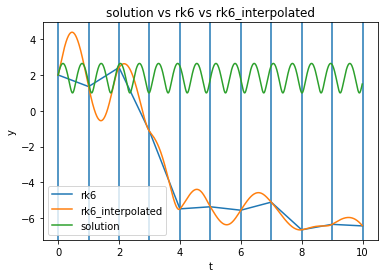

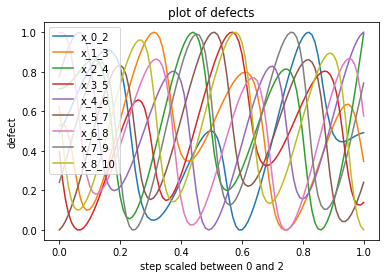

In [20]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

0 2 0.0029538088742874224
1 3 0.00015162961332516878
2 4 1.7161017802802547e-05
3 5 3.3773572481327063e-06
4 6 9.17664066811541e-07
5 7 3.071356347791876e-07
6 8 1.1940660767789657e-07
7 9 5.199391685251076e-08
8 10 2.4744405810808723e-08


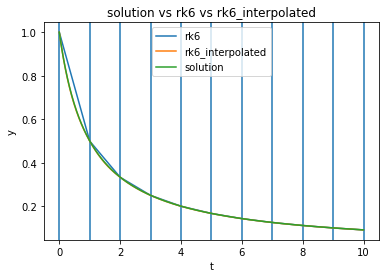

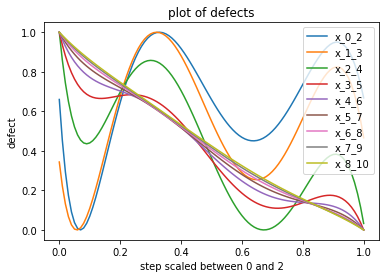

In [21]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

0 2 -3.956280549832769e-07
1 3 0.00022919589141845442
2 4 0.00022445801706980073
3 5 3.18189463801577e-05
4 6 -0.00015265902276817567
5 7 -0.00017531678966217767
6 8 -4.643312138002953e-05
7 9 9.81362651212292e-05
8 10 0.00013397106623785904


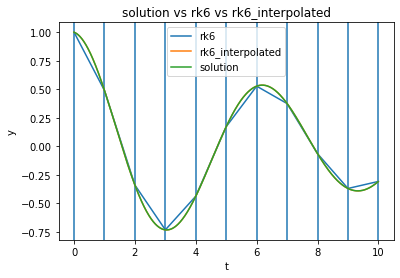

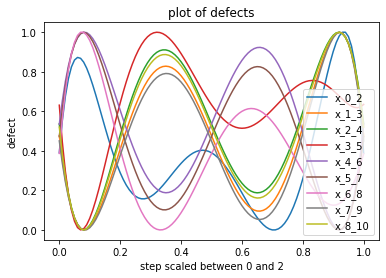

In [22]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

0 2 0.008787349461286176
1 3 -0.00808398571076202
2 4 0.015977342848796483
3 5 -0.029262795107564077
4 6 0.053887462320710844
5 7 -0.09919403299215535
6 8 0.1825980668026066
7 9 -0.3361289041858089
8 10 0.6187505720384765


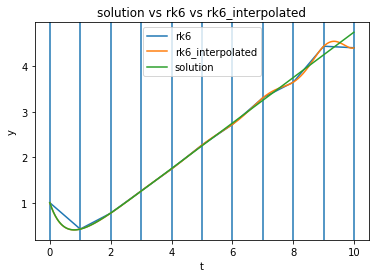

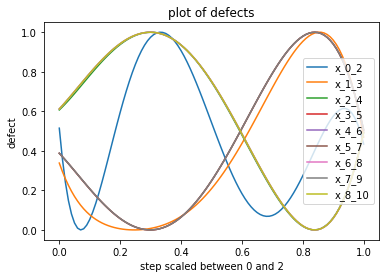

In [23]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)